In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df=pd.read_csv("fruits_dataset.csv")

In [5]:
df.head()

,Weight,Size,Class
0,69,4.39,banana
1,69,4.21,mango
2,65,4.09,peach
3,72,5.85,apple
4,67,4.70,banana


In [6]:
df.info

<bound method DataFrame.info of     Weight  Size       Class
0       69  4.39      banana
1       69  4.21       mango
2       65  4.09       peach
3       72  5.85       apple
4       67  4.70      banana
5       73  5.68        kiwi
6       70  5.56       apple
7       75  5.11       mango
8       74  5.36       apple
9       65  4.27      orange
10      73  5.79  watermelon
11      70  5.47       apple
12      74  5.53  watermelon
13      68  4.47      orange
14      74  5.22       apple
15      65  4.48      orange
16      69  4.66      orange
17      75  5.25       apple
18      67  4.18      orange
19      74  5.50      banana
20      66  4.13      orange
21      70  4.83      orange
22      69  4.61      banana
23      68  4.08       peach
24      67  4.25      orange
25      71  5.35       apple
26      67  4.01      orange
27      70  4.22        kiwi
28      74  5.25       apple
29      71  5.26       apple
30      73  5.78        kiwi
31      66  4.68      orange
32      72 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

In [9]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [10]:
classifier = SVC(kernel='rbf', random_state = 1, gamma=0.8)
classifier.fit(X_train,Y_train)

SVC(gamma=0.8, random_state=1)

In [11]:
Y_prediction = classifier.predict(X_test)

In [12]:
test_set["Predictions"] = Y_prediction

<ipython-input-12-85ee06a09b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_prediction


In [13]:
test_set

,Weight,Size,Class,Predictions
2,65,4.09,peach,orange
31,66,4.68,orange,orange
3,72,5.85,apple,apple
21,70,4.83,orange,apple
27,70,4.22,kiwi,banana
29,71,5.26,apple,apple
22,69,4.61,banana,orange
39,73,5.03,kiwi,kiwi


In [14]:
cm = confusion_matrix(Y_test,Y_prediction)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("Accuracy Of SVM For The Given Dataset : ", accuracy)

Accuracy Of SVM For The Given Dataset :  0.5


In [15]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [38]:
classifier = SVC(kernel='rbf', random_state = 1, gamma=0.8)
classifier.fit(X_train,Y_train)

SVC(gamma=0.8, random_state=1)

In [21]:
#Actual Output

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

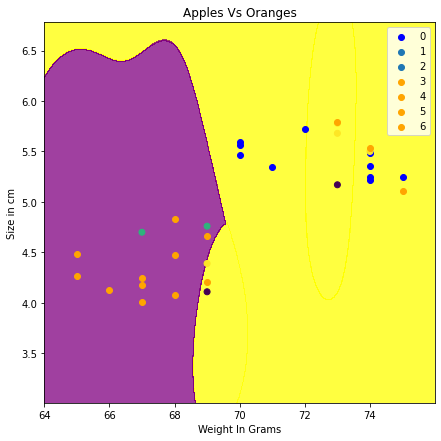

In [35]:
plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('yellow', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()


In [23]:
# Predicted Output

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

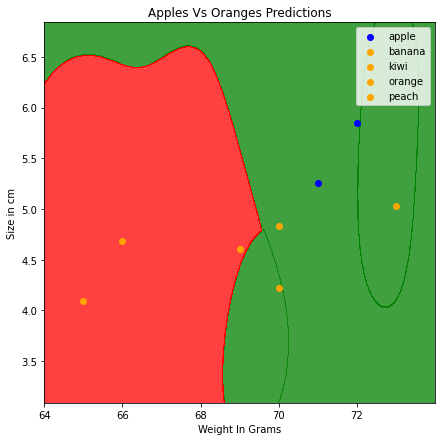

In [33]:
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

In [25]:
classifier2= SVC(kernel='linear', random_state = 1)
classifier2.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

In [26]:
Y_pred = classifier.predict(X_test)

In [27]:
test_set["Predictions"] = Y_pred

<ipython-input-27-946a65001e17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


In [28]:
test_set

,Weight,Size,Class,Predictions
2,65,4.09,peach,4
31,66,4.68,orange,4
3,72,5.85,apple,0
21,70,4.83,orange,0
27,70,4.22,kiwi,1
29,71,5.26,apple,0
22,69,4.61,banana,4
39,73,5.03,kiwi,2


In [37]:
df.dtypes

Weight      int64
Size      float64
Class      object
dtype: object